# Conservation of Cell Cylce effect
Before vs. after integration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scIB

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.6.22.post1 umap==0.3.9 numpy==1.17.0 scipy==1.3.1 pandas==0.25.0 scikit-learn==0.20.4 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
plt.rcParams['figure.figsize'] = 8,8

In [3]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/MCA/Lung_norm.h5ad"

In [4]:
adata = sc.read(adata_file, cache=True)

In [5]:
scIB.preprocessing.reduce_data(adata, hvg=False, pca=True, umap=True)
sc.tl.louvain(adata, resolution=0.5, key_added='louvain')

paga_groups: batch
computing PCA with n_comps = 50
    finished (0:01:24.59)
computing neighbors
    using 'X_pca' with n_pcs = 50


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/icb/

    finished (0:00:07.52) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 50
    finished (0:00:53.91) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01.06) --> found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


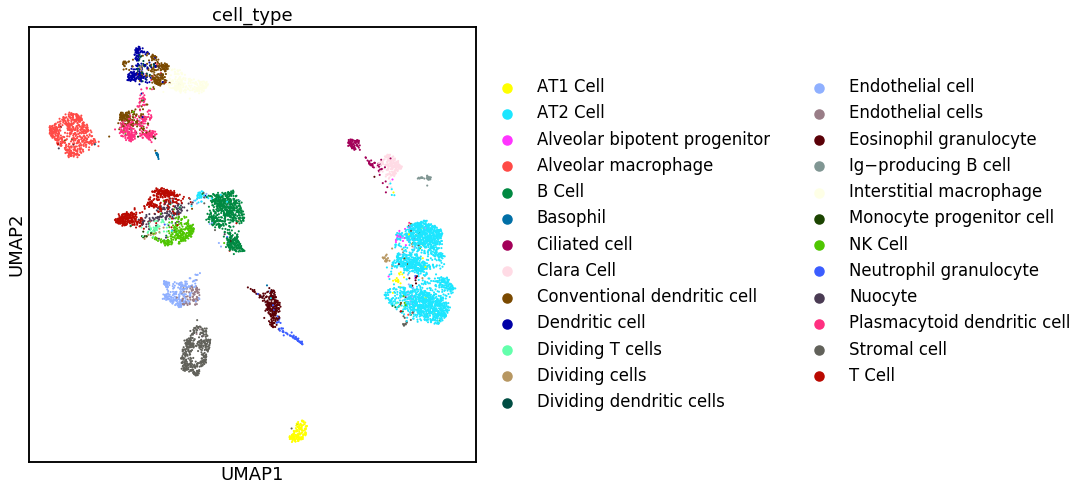

In [6]:
sc.pl.umap(adata, color=['cell_type'], palette=sc.pl.palettes.godsnot_64)
#sc.pl.umap(adata, color=['louvain'], palette=sc.pl.palettes.godsnot_64)

## Compute cell cycle scores

Using Tirosh et al. cell cycle marker genes

In [7]:
marker_gene_file = '../data/regev_lab_cell_cycle_genes.txt'

In [8]:
cell_cycle_genes = [x.strip().lower().capitalize() for x in open(marker_gene_file)]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
# split list into S-phase and G2/M-phase genes
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [9]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished (0:00:20.03) --> added
    'S_score', score of gene set (adata.obs)
computing score 'G2M_score'
    finished (0:00:18.29) --> added
    'G2M_score', score of gene set (adata.obs)
-->     'phase', cell cycle phase (adata.obs)


In [ ]:
scIB.metrics.pcr_comparison(adata, adata.layers['counts'], adata.X)

covariate: phase


In [ ]:
def cc_tirosh(marker_gene_file):
    """
    Tirosh et al. cell cycle marker genes downloaded from
    https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt
    return: (s_genes, g2m_genes)
        s_genes: S-phase genes
        g2m_genes: G2- and M-phase genes
    """
    cell_cycle_genes = [x.strip().lower().capitalize() for x in open(marker_gene_file)]
    cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
    # split list into S-phase and G2/M-phase genes
    s_genes = cell_cycle_genes[:43]
    g2m_genes = cell_cycle_genes[43:]
    
    return s_genes, g2m_genes

## Cell cycle effect

In [ ]:
s_genes, g2m_genes = cc_tirosh(marker_gene_file)
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
effect = scIB.metrics.pcr_comparison(adata, adata.layers['counts'], adata.X, covariate="phase")

In [ ]:
cell_cycle_effect(adata, marker_gene_file)